TASK-1 prediction of Graduate Admissions

problem statement : with help of the dataset provide we need make prdiction on graduate admission from the indian perspective using classfication                         technique so we use 3 classification technique in this solution and calculated the accurary from the 3 technique
                    1. logistic regression
                    2. svm
                    3. randomforestregression
                    

In [2]:
import numpy as np
import pandas as pd

now let import he dataset using pandas library function

In [3]:
ds=pd.read_csv("Admission_Predict.csv")

In [4]:
ds.head()    #show 1st 5 rows of the dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,COA
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
ds.shape #show the no.of rows and column in dataset

(400, 9)

In [6]:
#let us check for any null values in dataset or not

In [7]:
ds.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
COA                  0
dtype: int64

so from the above result we see there is no null values in the dataset.  

In [8]:
ds.dtypes #give you the datatype of the columns

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
COA                  float64
dtype: object

In [9]:
# the output of this is chance of admit which range from 0 to 1 so let output will in range 0 to 1

DATA EXPLORATION

In [10]:
ds.describe() #give the statics data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,COA
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [11]:
ds.groupby('University Rating').mean() 

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,COA
University Rating,,,,,,,,
1,233.807692,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,214.813084,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,204.165414,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,199.594595,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,153.533333,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


In [12]:
# the above describe the each university rating of the students. you can clearly see a student with rating 4 and 5 has chance of admit 0.8 to 0.9

In [13]:
# from the above we can see chance of admit is on average 0.7 to 0.8 to get the admission now let perform chance of student with 0.75 and chance admit with mean 

In [14]:
ds[ds['COA']>0.75].groupby('COA').mean()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
COA,,,,,,,,
0.76,187.166667,317.583333,105.666667,3.416667,3.875000,3.833333,8.672500,0.416667
0.77,252.625000,314.500000,106.250000,3.375000,3.875000,3.937500,8.711250,0.375000
0.78,170.333333,321.833333,109.416667,3.333333,3.708333,3.750000,8.785000,0.833333
0.79,249.500000,320.583333,109.333333,3.250000,3.625000,3.625000,8.755833,0.666667
0.80,231.454545,324.000000,111.545455,3.090909,3.545455,3.409091,8.872727,0.909091
0.81,275.625000,322.875000,109.750000,3.500000,3.437500,3.250000,8.805000,0.875000
0.82,234.125000,321.000000,109.250000,3.625000,3.937500,4.000000,9.002500,0.750000
0.83,251.000000,326.000000,112.666667,3.666667,3.833333,4.166667,9.120000,0.666667
0.84,207.111111,324.000000,109.444444,3.444444,3.777778,3.555556,9.038889,1.000000


OBERVATION FROM ABOVE DATA EXPLORATION:
1. student with 'COA' range from 0.91 to 0.97 has good mean ratio in research,CGPA,gre,toefl score
2. student with university ranking 4 and 5 as high chance to get graduate admission
3. student with CGPA greater than 9 have high rate to admit in college


These are the obervation I seen from it

DATA VISUALIZATION

In [15]:
import matplotlib.pyplot as plt

In [16]:
import seaborn as sns

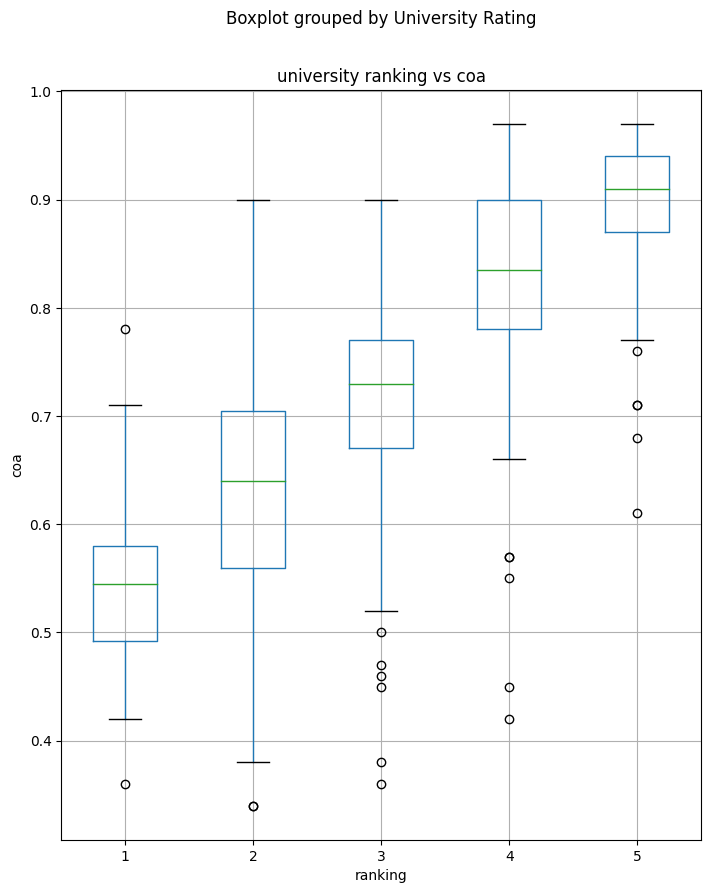

In [17]:
# university ranking vs coa
ds.boxplot(column='COA',by='University Rating',grid=True,figsize=(8,10))
plt.title("university ranking vs coa")
plt.xlabel("ranking")
plt.ylabel("coa")
plt.show()

from the figure we can visualize the university with rank 4 and 5 as high chance of admit

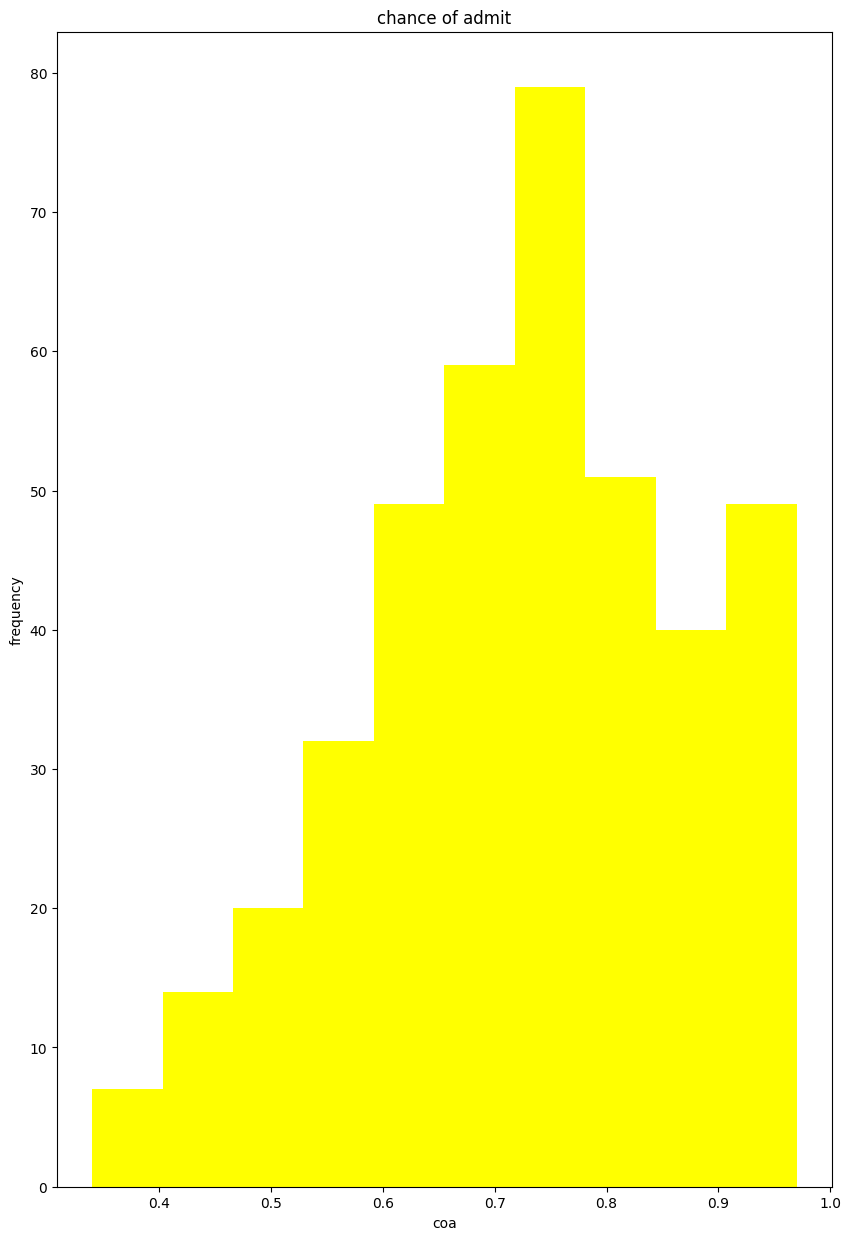

In [18]:
plt.figure(figsize=(10,15))
plt.hist(ds['COA'],bins=10,color='yellow')
plt.title("chance of admit")
plt.xlabel("coa")
plt.ylabel("frequency")
plt.show()

from the above fig we can say max no.of.student as the COA range from 0.75 to 0.85

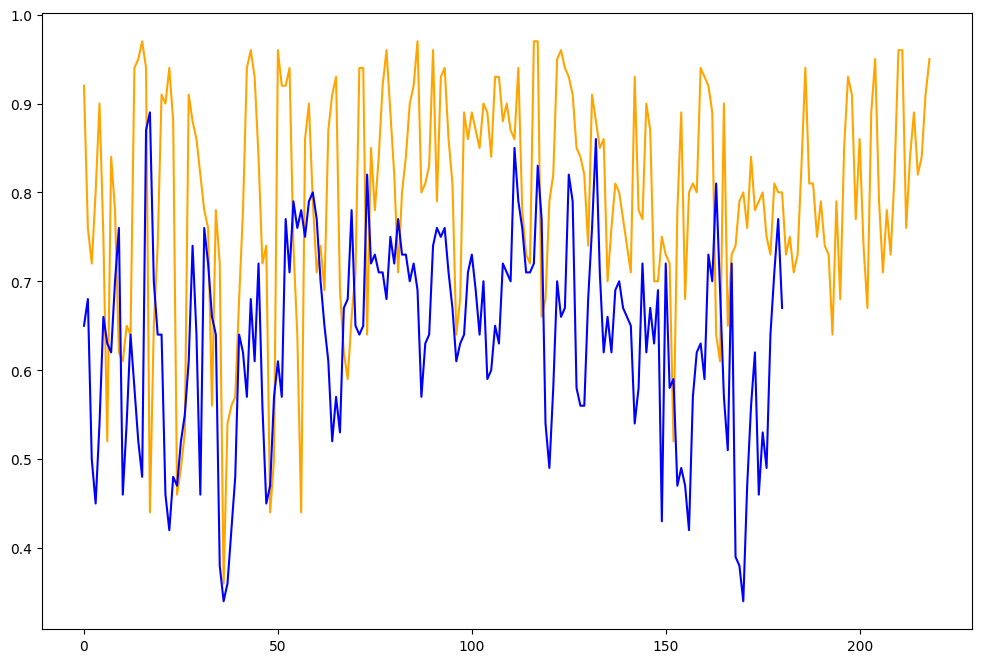

In [19]:
plt.figure(figsize=(12,8))
plt.plot(range(len(ds[ds['Research']==1])), ds[ds['Research']==1]['COA'], color='orange')
plt.plot(range(len(ds[ds['Research']==0])), ds[ds['Research']==0]['COA'], color='blue')
plt.show()

from the figure we can see how the research with and without that

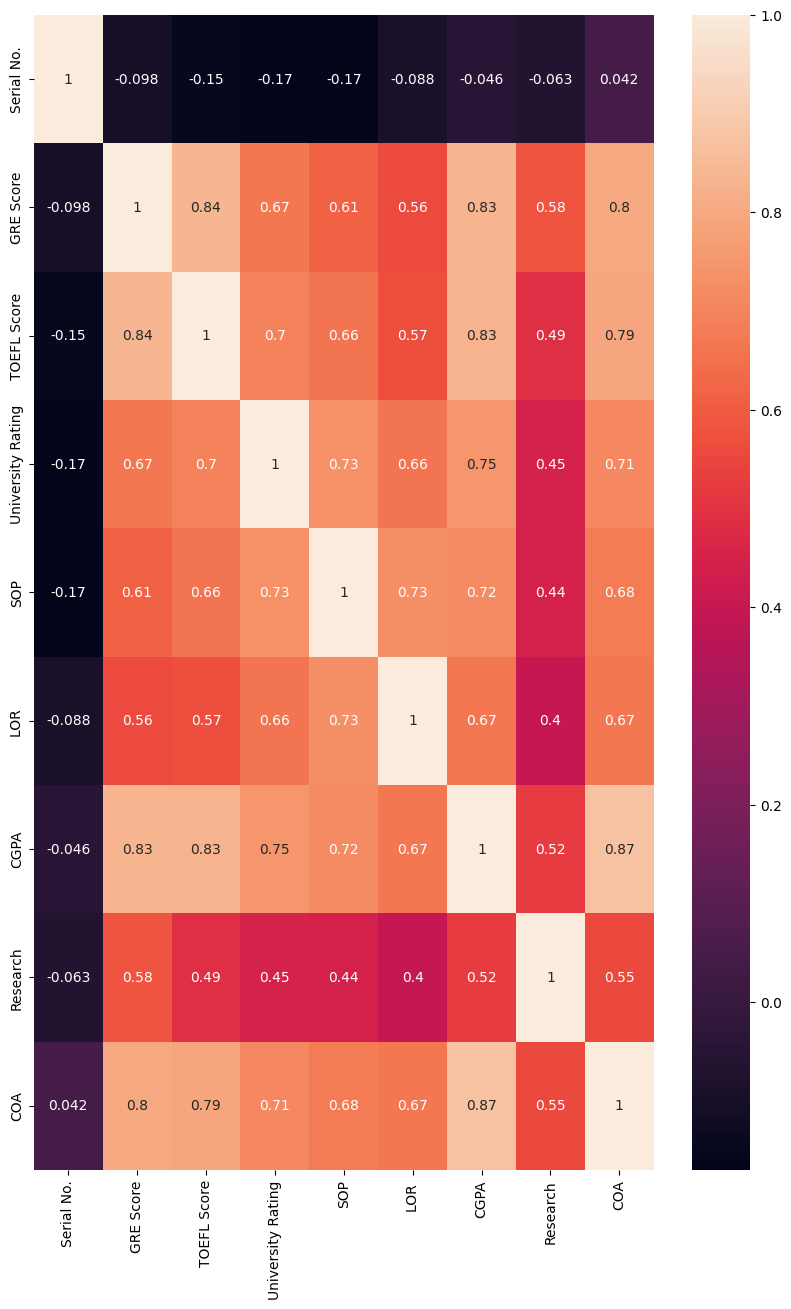

In [20]:
# heatmap
plt.figure(figsize=(10,15))
sns.heatmap(ds.corr(),annot=True)
plt.show()

from the above heatmap we can state a coa have high correlation with gre score,toefl,cgpa and so other factors plays some major role in COA

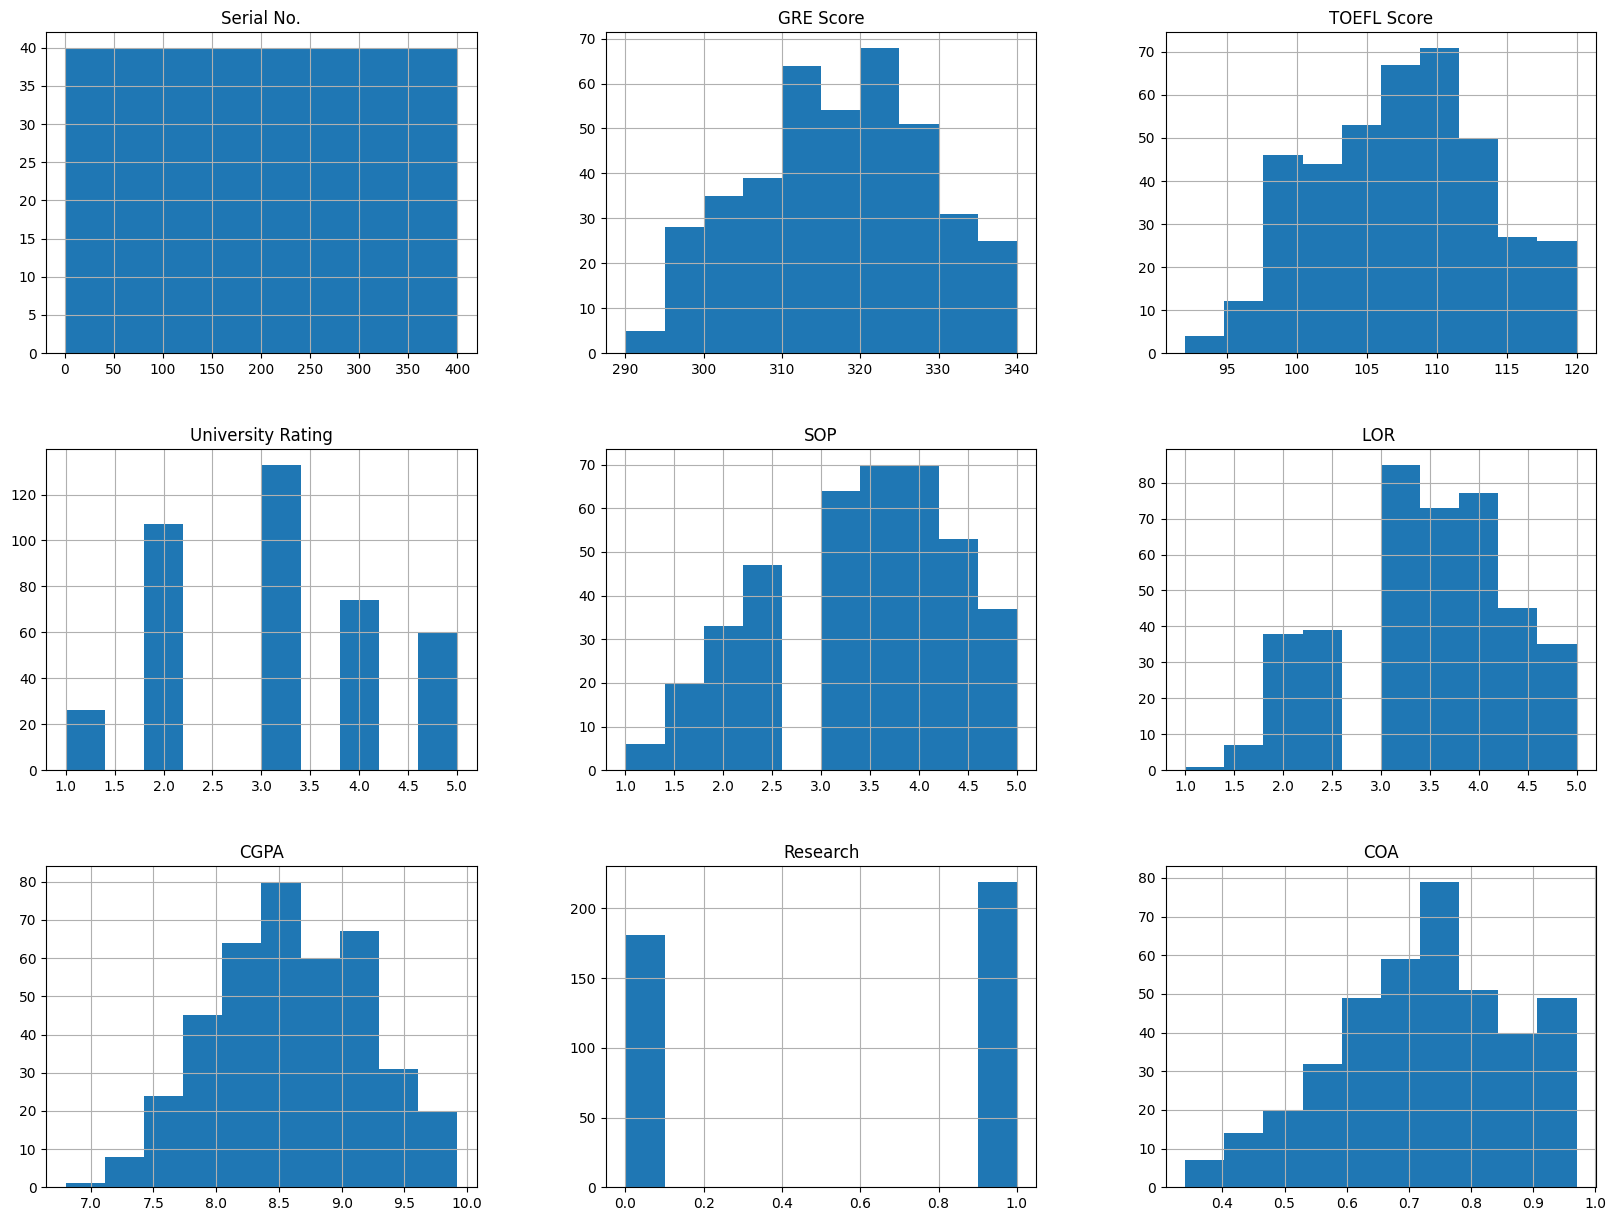

In [21]:
ds.hist(bins=10, figsize=(20,15))
plt.show()

DATA PREPERATION
In this data preperation only numeric data type should only be presented
1. outcome of this is chance and other feature are predictor
2. serial no column doesn't have any use in this case so drop it.

In [22]:
y=ds.COA

In [23]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: COA, Length: 400, dtype: float64

In [24]:
x=ds.drop(['COA','Serial No.'],axis=1)

In [25]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [57]:
#spliting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [58]:
from sklearn.preprocessing import MinMaxScaler
fs=MinMaxScaler()
x_train[x_train.columns]=fs.fit_transform(x_train[x_train.columns])
x_test[x_test.columns]=fs.transform(x_test[x_test.columns])

In [77]:
print(y_test.size)
print(x_train.size)

80
2240


In [89]:
# let make some change in test set if COA >0.82 the value is 1 else 0 it's assumption only
cy_train=[1 if COA>0.82 else 0 for COA in y_train]
cy_train=np.array(cy_train)
cy_test=[1 if COA>0.82 else 0 for COA in y_test]
cy_test=np.array(cy_test)

In [79]:
#logistic regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,cy_train)

LogisticRegression()

In [80]:
from sklearn.metrics import accuracy_score
print('logisticregression acurrary:{:3F}'.format(accuracy_score(cy_test,LR.predict(x_test))))
print("------------------------")
print(classification_report(cy_test, LR.predict(x_test)))

logisticregression acurrary:0.925000
------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        61
           1       0.93      0.74      0.82        19

    accuracy                           0.93        80
   macro avg       0.93      0.86      0.89        80
weighted avg       0.93      0.93      0.92        80



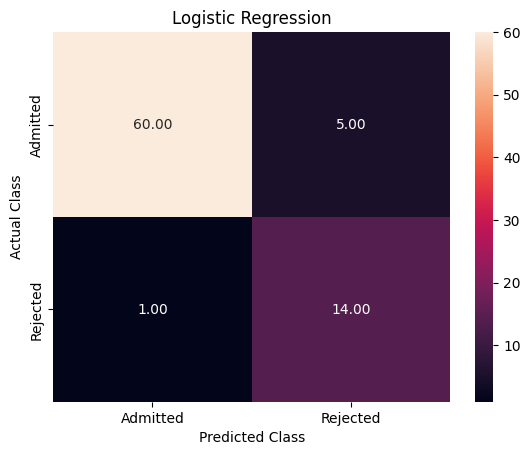

In [81]:
cy = LR.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
lr_confm = confusion_matrix(cy, cy_test)
sns.heatmap(lr_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Logistic Regression')
plt.show()

In [82]:
# random forest method

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, cy_train)

RandomForestClassifier()

In [84]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(cy_test, rf.predict(x_test))))
print('--------------------------------------')
print(classification_report(cy_test, rf.predict(x_test)))

Random Forest Accuracy: 0.950
--------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        61
           1       0.94      0.84      0.89        19

    accuracy                           0.95        80
   macro avg       0.95      0.91      0.93        80
weighted avg       0.95      0.95      0.95        80



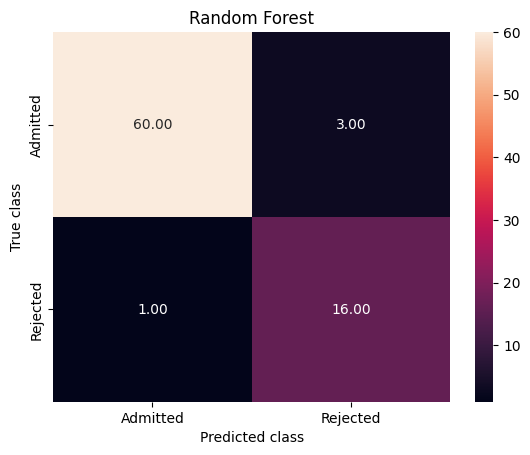

In [85]:
cy = rf.predict(x_test)
rf_confm = confusion_matrix(cy, cy_test)
sns.heatmap(rf_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.show()

In [90]:
f_imp=pd.Series(rf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
print(f_imp)

CGPA                 0.382321
GRE Score            0.176990
TOEFL Score          0.173284
University Rating    0.105073
LOR                  0.084594
SOP                  0.063081
Research             0.014658
dtype: float64


above are important feature in predicting the randomforest

In [86]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, cy_train)

SVC()

In [87]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(cy_test, svc.predict(x_test))))
print('--------------------------------------')
print(classification_report(cy_test, svc.predict(x_test)))

Support vector machine accuracy: 0.912
--------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        61
           1       0.93      0.68      0.79        19

    accuracy                           0.91        80
   macro avg       0.92      0.83      0.87        80
weighted avg       0.91      0.91      0.91        80



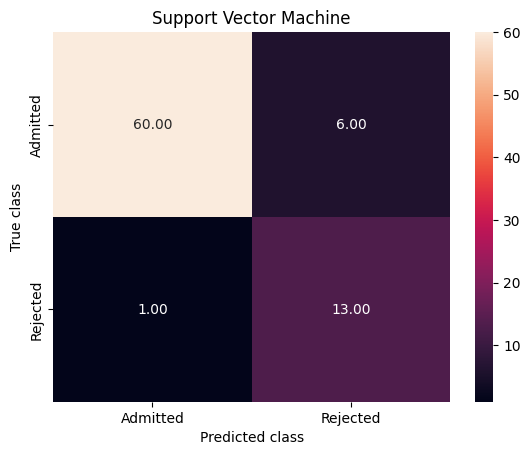

In [88]:
cy = svc.predict(x_test)
svc_confm = confusion_matrix(cy, cy_test)
sns.heatmap(svc_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.show()

From the above three model the actaul and predicted class give same o/p on admitted which is 60 and all three model evaluted 75% correct